## Tarea4: Air Quality ZMVM 
##### In this Notebook we will look at weather stations over time and their correlations. 
More specifically we will look at the following tasks:


1. Escoger al menos tres estaciones de monitoreo, que registre O3, CO y NO2. (Choose at least three monitoring stations that record O3, CO and NO2.)


2. Registrar el promedio diario de contaminante por un periodo continuo de al menos tres años. ( Record the average daily pollutant for a continuous period of at least three years.)


3. Obtener el histograma de concentracion de cada contaminante, por estacion. (Obtain the histogram of the concentration of each pollutant, by station.)


4. Computar la matriz de correlacion para cada contaminante, recurriendo a Pearson, Spearman y funcion de informacion Mutua para cada par de estaciones. (Compute the correlation matrix for each pollutant, using Pearson, Spearman and Mutual information function for each pair of stations.)


5. ¿Que preguntas se pueden hacer sobre este fenomeno, a partir de este conjunto de datos? (What questions can be asked about this phenomenon from this data set?)

Let's start by loading the data. 

In [1]:
# imports to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns

In [2]:
# loading the O3, CO and NO2 xls files as dataframes for 2021
df_21O3 = pd.read_excel('21RAMA/2021O3.xls')
print(df_21O3.head())

df_21CO = pd.read_excel('21RAMA/2021CO.xls')
print(df_21CO.head())

df_21NO2 = pd.read_excel('21RAMA/2021NO2.xls')
print(df_21NO2.head())

       FECHA  HORA  ACO  AJM  AJU  ATI  BJU  CAM  CCA  CHO  ...  SAG  SFE  \
0 2021-01-01     1  -99  -99   24   23    2    9    7  -99  ...   13   19   
1 2021-01-01     2  -99  -99   25   12    2    0    8  -99  ...   12   21   
2 2021-01-01     3  -99  -99   24    9    6    1    7  -99  ...   12   25   
3 2021-01-01     4  -99  -99   23    4    3    0    6  -99  ...    7   27   
4 2021-01-01     5  -99  -99   25    3    6    3    3  -99  ...    9   24   

   SJA  TAH  TLA  TLI  UAX  UIZ  VIF  XAL  
0  -99   23   12  -99   25   21    2  -99  
1  -99   10   13  -99   15    8    2  -99  
2  -99   11    6  -99   12   11    4  -99  
3  -99   20    4  -99    8    6    6  -99  
4  -99   18    4  -99    8    6    5  -99  

[5 rows x 38 columns]
       FECHA  HORA   ACO  AJM   ATI   BJU   CAM   CCA   CHO   CUA  ...   SAC  \
0 2021-01-01     1 -99.0  -99  0.25  1.40  0.59  0.53 -99.0 -99.0  ...  0.24   
1 2021-01-01     2 -99.0  -99  0.56  1.22  0.97  0.52 -99.0 -99.0  ...  0.22   
2 2021-01-

In [3]:
# Let's find stations (columns) that exist in all three dataframes
coherent_stations = list(set(df_21O3.columns) & set(df_21CO.columns) & set(df_21NO2.columns))
print(coherent_stations)

['MPA', 'HORA', 'AJM', 'MON', 'TAH', 'LLA', 'CCA', 'FECHA', 'UAX', 'PED', 'LPR', 'VIF', 'IZT', 'UIZ', 'XAL', 'SFE', 'CAM', 'INN', 'HGM', 'MGH', 'CHO', 'SAG', 'SAC', 'CUA', 'FAR', 'NEZ', 'TLI', 'ATI', 'FAC', 'ACO', 'MER', 'TLA', 'SJA', 'BJU']


#### Now we can choose 3 Stations to continue with -> wee continue with UAX, MER and CAM
Let's check if these stations also exist in the data from 2022 and 2023
Then we will track the average daily pollution

In [4]:
# loading the data for 2022 and 2023 and finding the coherent stations

# for 2022
df_22O3 = pd.read_excel('22RAMA/2022O3.xls')
df_22CO = pd.read_excel('22RAMA/2022CO.xls')
df_22NO2 = pd.read_excel('22RAMA/2022NO2.xls')

# for 2023
df_23O3 = pd.read_excel('23RAMA/2023O3.xls')
df_23CO = pd.read_excel('23RAMA/2023CO.xls')
df_23NO2 = pd.read_excel('23RAMA/2023NO2.xls')

# checking if UAX, MER and CUA ecist in all three years as column names
# updating coherent stations to include the stations that exist in all three years
coherent_stations = list(set(df_21O3.columns) & set(df_21CO.columns) & set(df_21NO2.columns) & set(df_22O3.columns) & set(df_22CO.columns) & set(df_22NO2.columns) & set(df_23O3.columns) & set(df_23CO.columns) & set(df_23NO2.columns))
print(coherent_stations)

if 'UAX' in coherent_stations and 'MER' in coherent_stations and 'BJU' in coherent_stations:
    print('UAX, MER and CUA are coherent stations')

['MPA', 'HORA', 'AJM', 'MON', 'TAH', 'LLA', 'CCA', 'FECHA', 'UAX', 'PED', 'LPR', 'VIF', 'IZT', 'UIZ', 'XAL', 'SFE', 'CAM', 'INN', 'HGM', 'MGH', 'CHO', 'SAG', 'SAC', 'CUA', 'FAR', 'NEZ', 'TLI', 'ATI', 'FAC', 'ACO', 'MER', 'TLA', 'SJA', 'BJU']
UAX, MER and CUA are coherent stations


In [5]:
# Uniting the dataframes for each value (CO, NO2, O3) 
df_O3 = pd.concat([df_21O3, df_22O3, df_23O3], axis=0)
df_CO = pd.concat([df_21CO, df_22CO, df_23CO], axis=0)
df_NO2 = pd.concat([df_21NO2, df_22NO2, df_23NO2], axis=0)

df_NO2.head()


,FECHA,HORA,ACO,AJM,AJU,ATI,BJU,CAM,CCA,CHO,...,SAG,SFE,SJA,TAH,TLA,TLI,UAX,UIZ,VIF,XAL
0,2021-01-01,1,-99,-99,-99,12,34,29,25,-99,...,19,19,-99,18,30,-99,10,19,35,-99
1,2021-01-01,2,-99,-99,-99,23,33,38,23,-99,...,19,17,-99,27,26,-99,16,28,31,-99
2,2021-01-01,3,-99,-99,-99,23,26,35,22,-99,...,19,12,-99,24,32,-99,17,23,29,-99
3,2021-01-01,4,-99,-99,-99,27,29,34,23,-99,...,23,11,-99,14,33,-99,18,29,30,-99
4,2021-01-01,5,-99,-99,-99,27,23,29,25,-99,...,21,12,-99,15,32,-99,18,26,29,-99


In [6]:
# Let's drop all columns but FECHA, HORA, MER, UAX and BJU from all dataframes
df_O3 = df_O3[['FECHA', 'HORA', 'MER', 'UAX', 'BJU']]
df_CO = df_CO[['FECHA', 'HORA', 'MER', 'UAX', 'BJU']]
df_NO2 = df_NO2[['FECHA', 'HORA', 'MER', 'UAX', 'BJU']]
print(df_O3.shape)
df_NO2.head()

(22608, 5)


,FECHA,HORA,MER,UAX,BJU
0,2021-01-01,1,32,10,34
1,2021-01-01,2,36,16,33
2,2021-01-01,3,32,17,26
3,2021-01-01,4,33,18,29
4,2021-01-01,5,31,18,23


In [7]:
# Turn all values with value -99 to NaN
df_O3 = df_O3.replace(-99, np.nan)
df_CO = df_CO.replace(-99, np.nan)
df_NO2 = df_NO2.replace(-99, np.nan)

In [8]:
# Let's drop all rows that contain at least one NaN values (-99) from all dataframes
# df_O3 = df_O3[(df_O3['MER'] != -99) & (df_O3['UAX'] != -99) & (df_O3['BJU'] != -99)]
# df_CO = df_CO[(df_CO['MER'] != -99) & (df_CO['UAX'] != -99) & (df_CO['BJU'] != -99)]
# df_NO2 = df_NO2[(df_NO2['MER'] != -99) & (df_NO2['UAX'] != -99) & (df_NO2['BJU'] != -99)]
# print(df_O3.shape)
# df_NO2.head()

## 2. Calculating the daily average poultion for 3 years (21-23) continiously

In [9]:
# Let's find the daily mean of the O3, CO and NO2 values for the coherent stations and plot the data
# for every date in column FECHA we will calculate the mean of the values for the coherent stations and plot the data
# for each value (O3, CO, NO2) in a separate plot


df_O3['FECHA'] = pd.to_datetime(df_O3['FECHA'])
df_CO['FECHA'] = pd.to_datetime(df_CO['FECHA'])
df_NO2['FECHA'] = pd.to_datetime(df_NO2['FECHA'])

dfNO2_daily = df_NO2.groupby(df_NO2['FECHA'].dt.date).mean(numeric_only=True)
dfCO_daily = df_CO.groupby(df_CO['FECHA'].dt.date).mean(numeric_only=True)
dfO3_daily = df_O3.groupby(df_O3['FECHA'].dt.date).mean(numeric_only=True)

dfO3_daily.index = pd.to_datetime(dfO3_daily.index)
dfCO_daily.index = pd.to_datetime(dfCO_daily.index)
dfNO2_daily.index = pd.to_datetime(dfNO2_daily.index)


dfNO2_daily.head()

,HORA,MER,UAX,BJU
FECHA,,,,
2021-01-01,12.5,26.083333,11.083333,17.916667
2021-01-02,12.5,39.904762,25.666667,28.428571
2021-01-03,12.5,35.750000,17.666667,23.708333
2021-01-04,12.5,47.833333,34.041667,31.833333
2021-01-05,12.5,37.625000,29.208333,30.041667


### 3. Plotting the daily average over 3 years for the stations UAX, MER and BJU

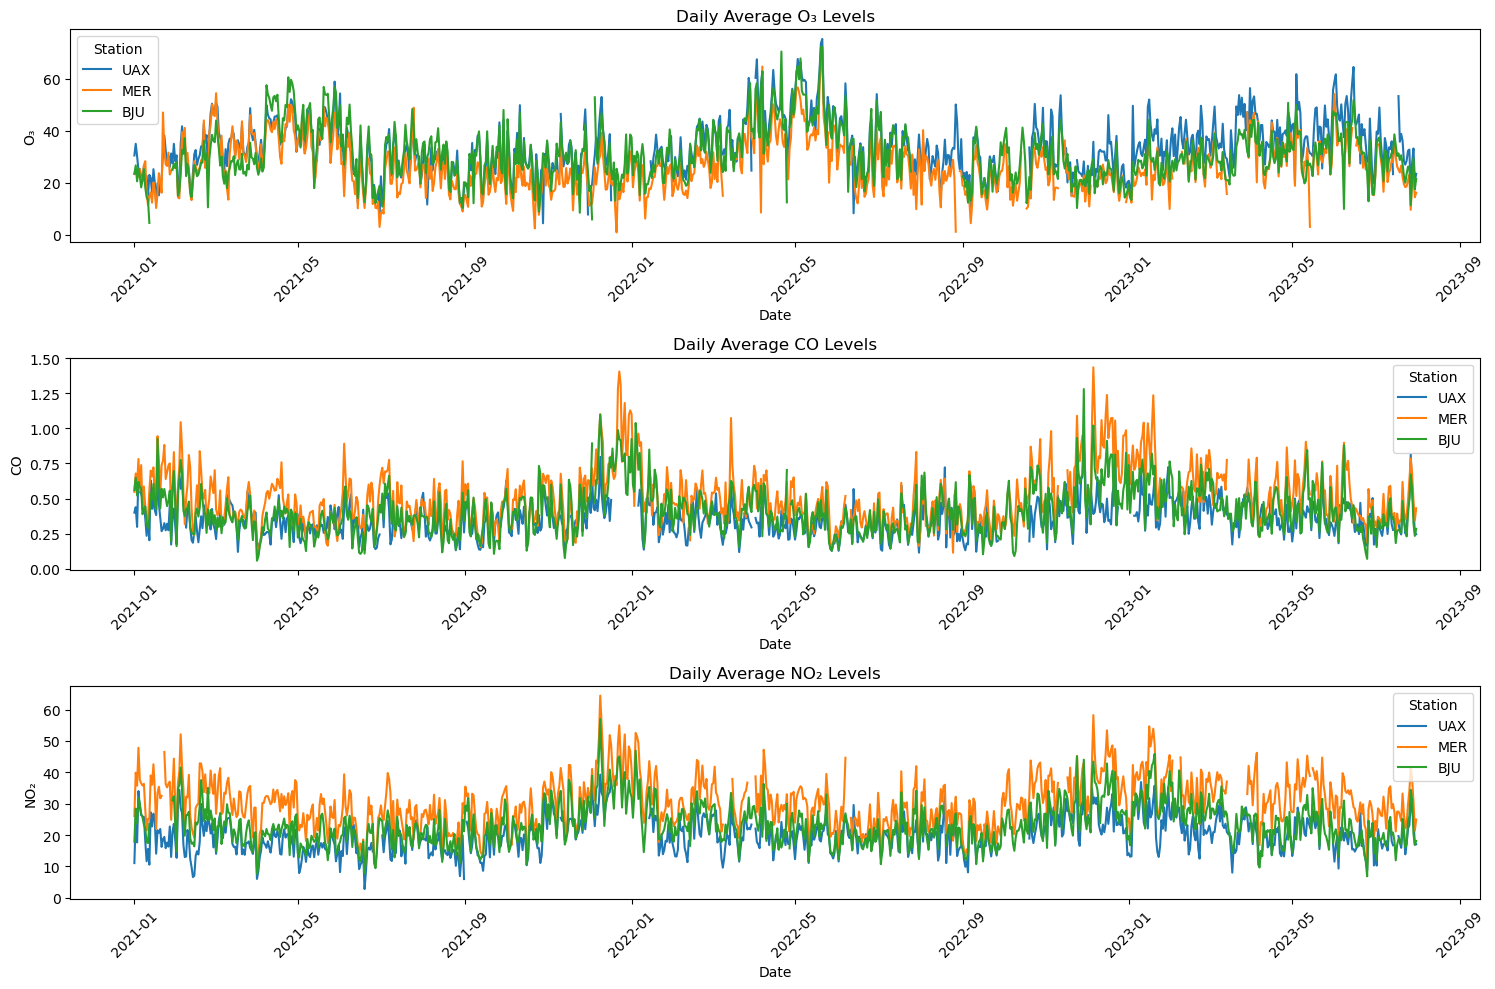

In [10]:
# stations we want to plot
columns_to_plot = ["UAX", "MER", "BJU"]

plt.figure(figsize=(15, 10))

# Plot O₃
plt.subplot(3, 1, 1)
for col in columns_to_plot:
    # Check if the column exists to avoid KeyError
    if col in dfO3_daily.columns:
        plt.plot(dfO3_daily.index, dfO3_daily[col], label=col)
plt.title("Daily Average O₃ Levels")
plt.xlabel("Date")
plt.ylabel("O₃")
plt.xticks(rotation=45)
plt.legend(title="Station")

# Plot CO
plt.subplot(3, 1, 2)
for col in columns_to_plot:
    if col in dfCO_daily.columns:
        plt.plot(dfCO_daily.index, dfCO_daily[col], label=col)
plt.title("Daily Average CO Levels")
plt.xlabel("Date")
plt.ylabel("CO")
plt.xticks(rotation=45)
plt.legend(title="Station")

# Plot NO₂
plt.subplot(3, 1, 3)
for col in columns_to_plot:
    if col in dfNO2_daily.columns:
        plt.plot(dfNO2_daily.index, dfNO2_daily[col], label=col)
plt.title("Daily Average NO₂ Levels")
plt.xlabel("Date")
plt.ylabel("NO₂")
plt.xticks(rotation=45)
plt.legend(title="Station")

plt.tight_layout()
plt.show()


#### Great this gives us some idea of the data. Next lets create some histograms for the polution of each station and polution value

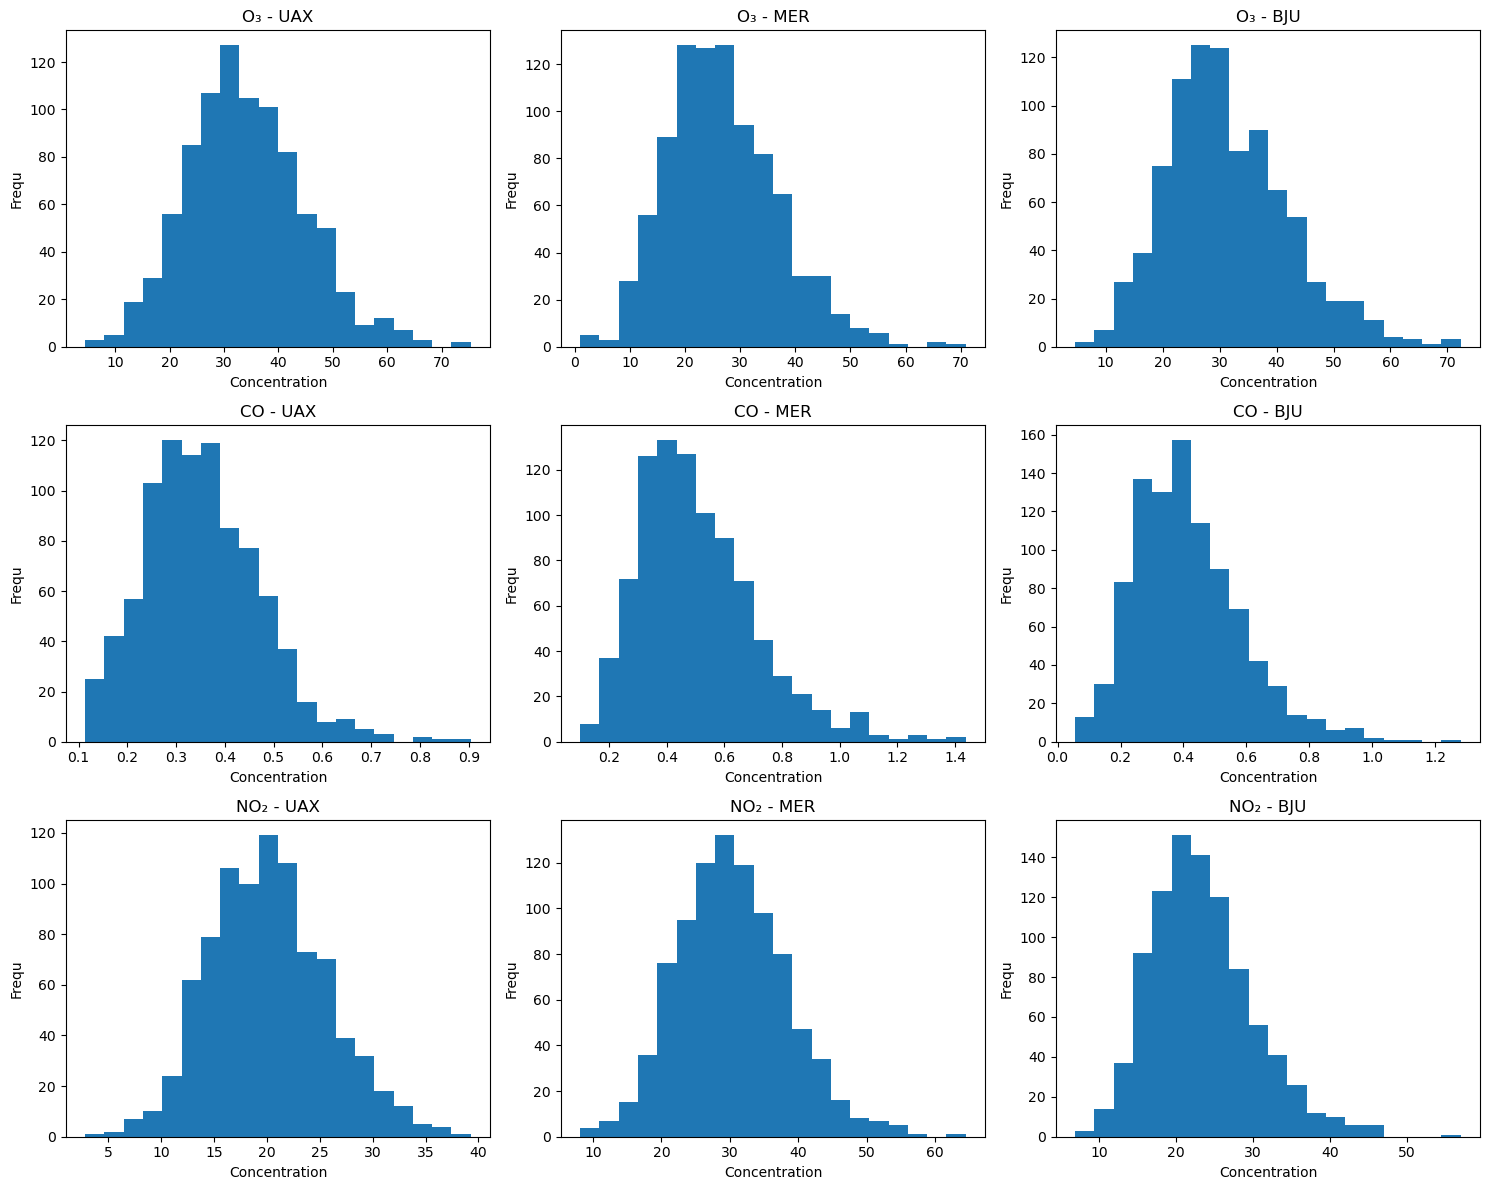

In [11]:
import matplotlib.pyplot as plt

# Define the pollutants and their corresponding daily DataFrames.
pollutants = {
    "O₃": dfO3_daily,
    "CO": dfCO_daily,
    "NO₂": dfNO2_daily
}

# Define the stations to plot.
stations = ["UAX", "MER", "BJU"]

# Create a figure with 3 rows (one per pollutant) and 3 columns (one per station)
fig, axes = plt.subplots(nrows=len(pollutants), ncols=len(stations), figsize=(15, 12))

# Loop over pollutants and stations to plot histograms.
for row, (pollutant, df) in enumerate(pollutants.items()):
    for col, station in enumerate(stations):
        ax = axes[row, col]
        # Check if the station column exists in the DataFrame.
        if station in df.columns:
            ax.hist(df[station].dropna(), bins=20)
            ax.set_title(f"{pollutant} - {station}")
        else:
            ax.text(0.5, 0.5, "Sin datos", ha='center', va='center')
        ax.set_xlabel("Concentration")
        ax.set_ylabel("Frequ")

plt.tight_layout()
plt.show()


### Let's next check the average pollution over the years to see if there's a trend

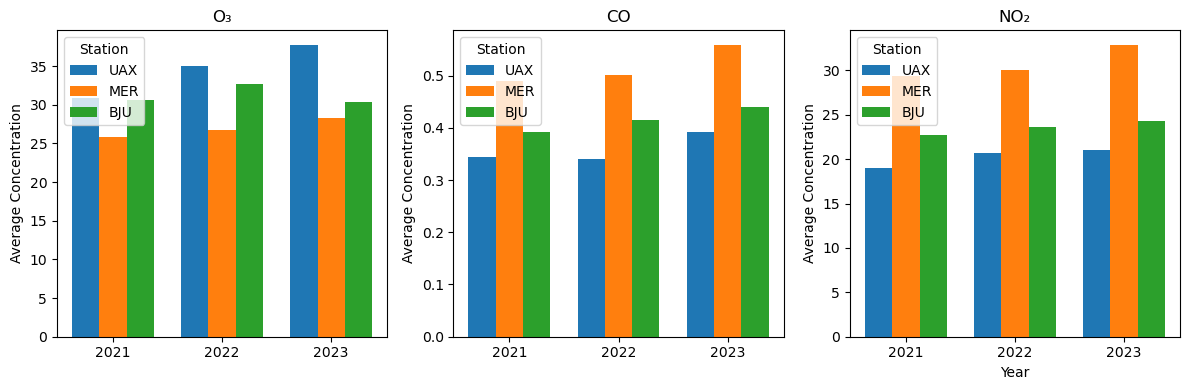

In [12]:
# creating yearly averages and detect trends
dfO3_yearly = dfO3_daily.groupby(dfO3_daily.index.year).mean()
dfCO_yearly = dfCO_daily.groupby(dfCO_daily.index.year).mean()
dfNO2_yearly = dfNO2_daily.groupby(dfNO2_daily.index.year).mean()

pollutant_yearly = {
    "O₃": dfO3_yearly,
    "CO": dfCO_yearly,
    "NO₂": dfNO2_yearly
}

stations = ["UAX", "MER", "BJU"]
years = dfO3_yearly.index
x = np.arange(len(years))
bar_width = 0.25

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

for i, (pollutant, df_yearly) in enumerate(pollutant_yearly.items()):
    ax = axes[i]
    for j, station in enumerate(stations):
        if station in df_yearly.columns:
            offset = (j - 1) * bar_width
            ax.bar(x + offset, df_yearly[station], width=bar_width, label=station)
    ax.set_title(f"{pollutant}")
    ax.set_ylabel("Average Concentration")
    ax.legend(title="Station")

axes[-1].set_xlabel("Year")
plt.xticks(x, years)
plt.tight_layout()
plt.show()


## Let's see if there are correlations by making use of the spearman and pearson correlation
We need to compute the matrixes and handle the earlier created NaN values.

In [ ]:

# First we need functions to compute the mutual information between two variables.
def compute_mutual_info(x, y):
    temp = pd.concat([x, y], axis=1).dropna()
    if temp.shape[0] == 0:
        return np.nan
    # Compute MI in both directions and average for symmetry.
    mi1 = mutual_info_regression(temp.iloc[:, [0]].values, temp.iloc[:, 1].values, random_state=0)[0]
    mi2 = mutual_info_regression(temp.iloc[:, [1]].values, temp.iloc[:, 0].values, random_state=0)[0]
    return (mi1 + mi2) / 2

def compute_mutual_info_matrix(df, columns):
    # Initialize an empty DataFrame to store MI values.
    mi_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)
    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                mi_matrix.loc[col1, col2] = np.nan 
            else:
                mi = compute_mutual_info(df[col1], df[col2])
                mi_matrix.loc[col1, col2] = mi
    return mi_matrix

In [ ]:
# Let's compute the matrixes for O3, CO and NO2

stations = ["UAX", "MER", "BJU"]

dfO3_pearson   = dfO3_daily[stations].corr(method='pearson')
dfO3_spearman  = dfO3_daily[stations].corr(method='spearman')
dfO3_mutual    = compute_mutual_info_matrix(dfO3_daily, stations)

dfCO_pearson   = dfCO_daily[stations].corr(method='pearson')
dfCO_spearman  = dfCO_daily[stations].corr(method='spearman')
dfCO_mutual    = compute_mutual_info_matrix(dfCO_daily, stations)

dfNO2_pearson  = dfNO2_daily[stations].corr(method='pearson')
dfNO2_spearman = dfNO2_daily[stations].corr(method='spearman')
dfNO2_mutual   = compute_mutual_info_matrix(dfNO2_daily, stations)



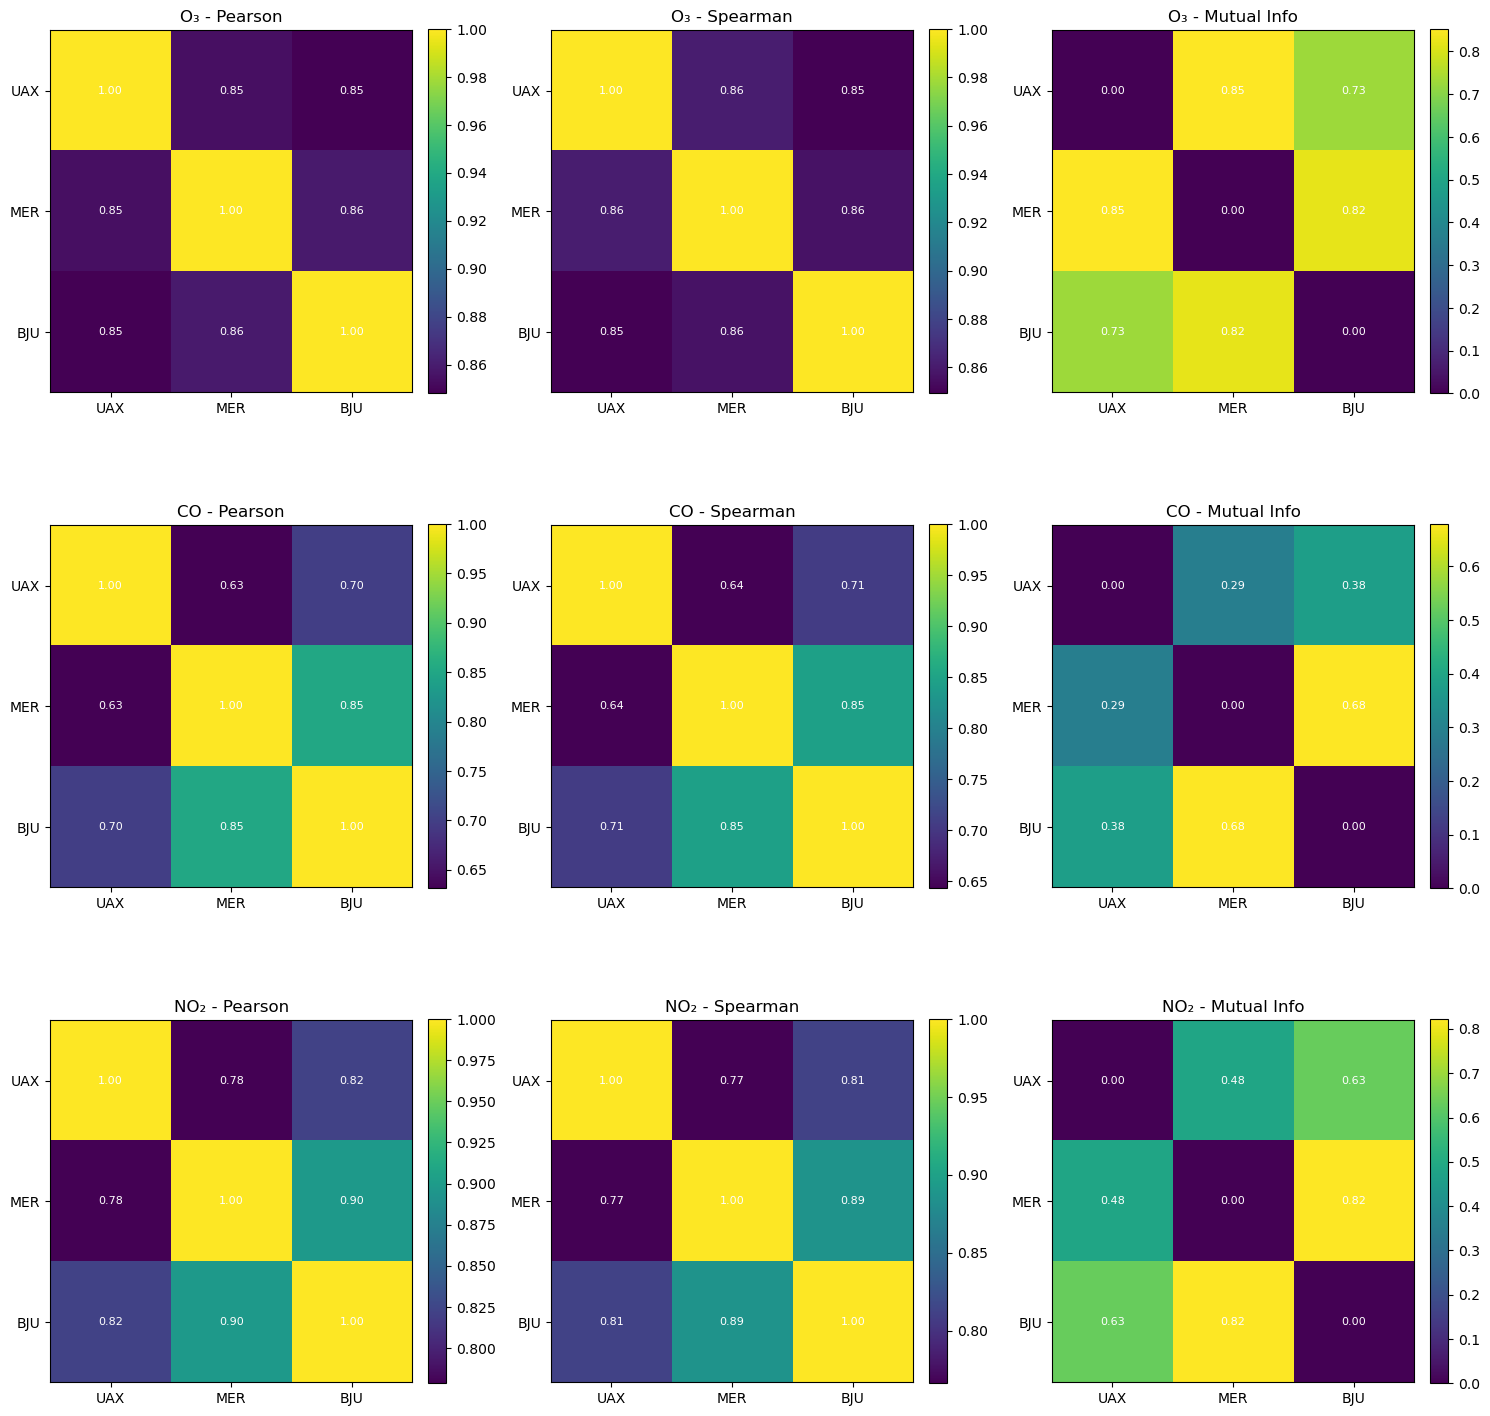

In [ ]:
stations = ["UAX", "MER", "BJU"]

corr_data = {
    "O₃": {
        "Pearson": dfO3_pearson,
        "Spearman": dfO3_spearman,
        "Mutual Info": dfO3_mutual
    },
    "CO": {
        "Pearson": dfCO_pearson,
        "Spearman": dfCO_spearman,
        "Mutual Info": dfCO_mutual
    },
    "NO₂": {
        "Pearson": dfNO2_pearson,
        "Spearman": dfNO2_spearman,
        "Mutual Info": dfNO2_mutual
    }
}

methods = ["Pearson", "Spearman", "Mutual Info"]
pollutants = ["O₃", "CO", "NO₂"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, pollutant in enumerate(pollutants):
    for j, method in enumerate(methods):
        ax = axes[i, j]
        matrix = corr_data[pollutant][method].fillna(0).values.astype(float)
        cax = ax.imshow(matrix, interpolation='nearest', cmap='viridis')
        ax.set_xticks(np.arange(len(stations)))
        ax.set_xticklabels(stations)
        ax.set_yticks(np.arange(len(stations)))
        ax.set_yticklabels(stations)
        ax.set_title(f"{pollutant} - {method}")
        for (k, l), value in np.ndenumerate(matrix):
            ax.text(l, k, f"{value:.2f}", ha='center', va='center', color='white', fontsize=8)
        fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


### 5. ¿Que preguntas se pueden hacer sobre este fenomeno, a partir de este conjunto de datos? (What questions can be asked about this phenomenon from this data set?)
##### We can ask a lot of question regarding the data like:
    - Is there a trend over longer term? What does the correlation look like over decades?
    - Why is there a seasonal shift regarding 03 and the other variables?
    - How does the pollution vary intraday -> is there more pollution during the day or night?
    - Which day is "the most polluted"? And is there more pollution during the week than weekends?

In [ ]:
# END